In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [0]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [0]:
USAhousing = pd.read_csv("input/USA_Housing.csv")
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [0]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [0]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [0]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

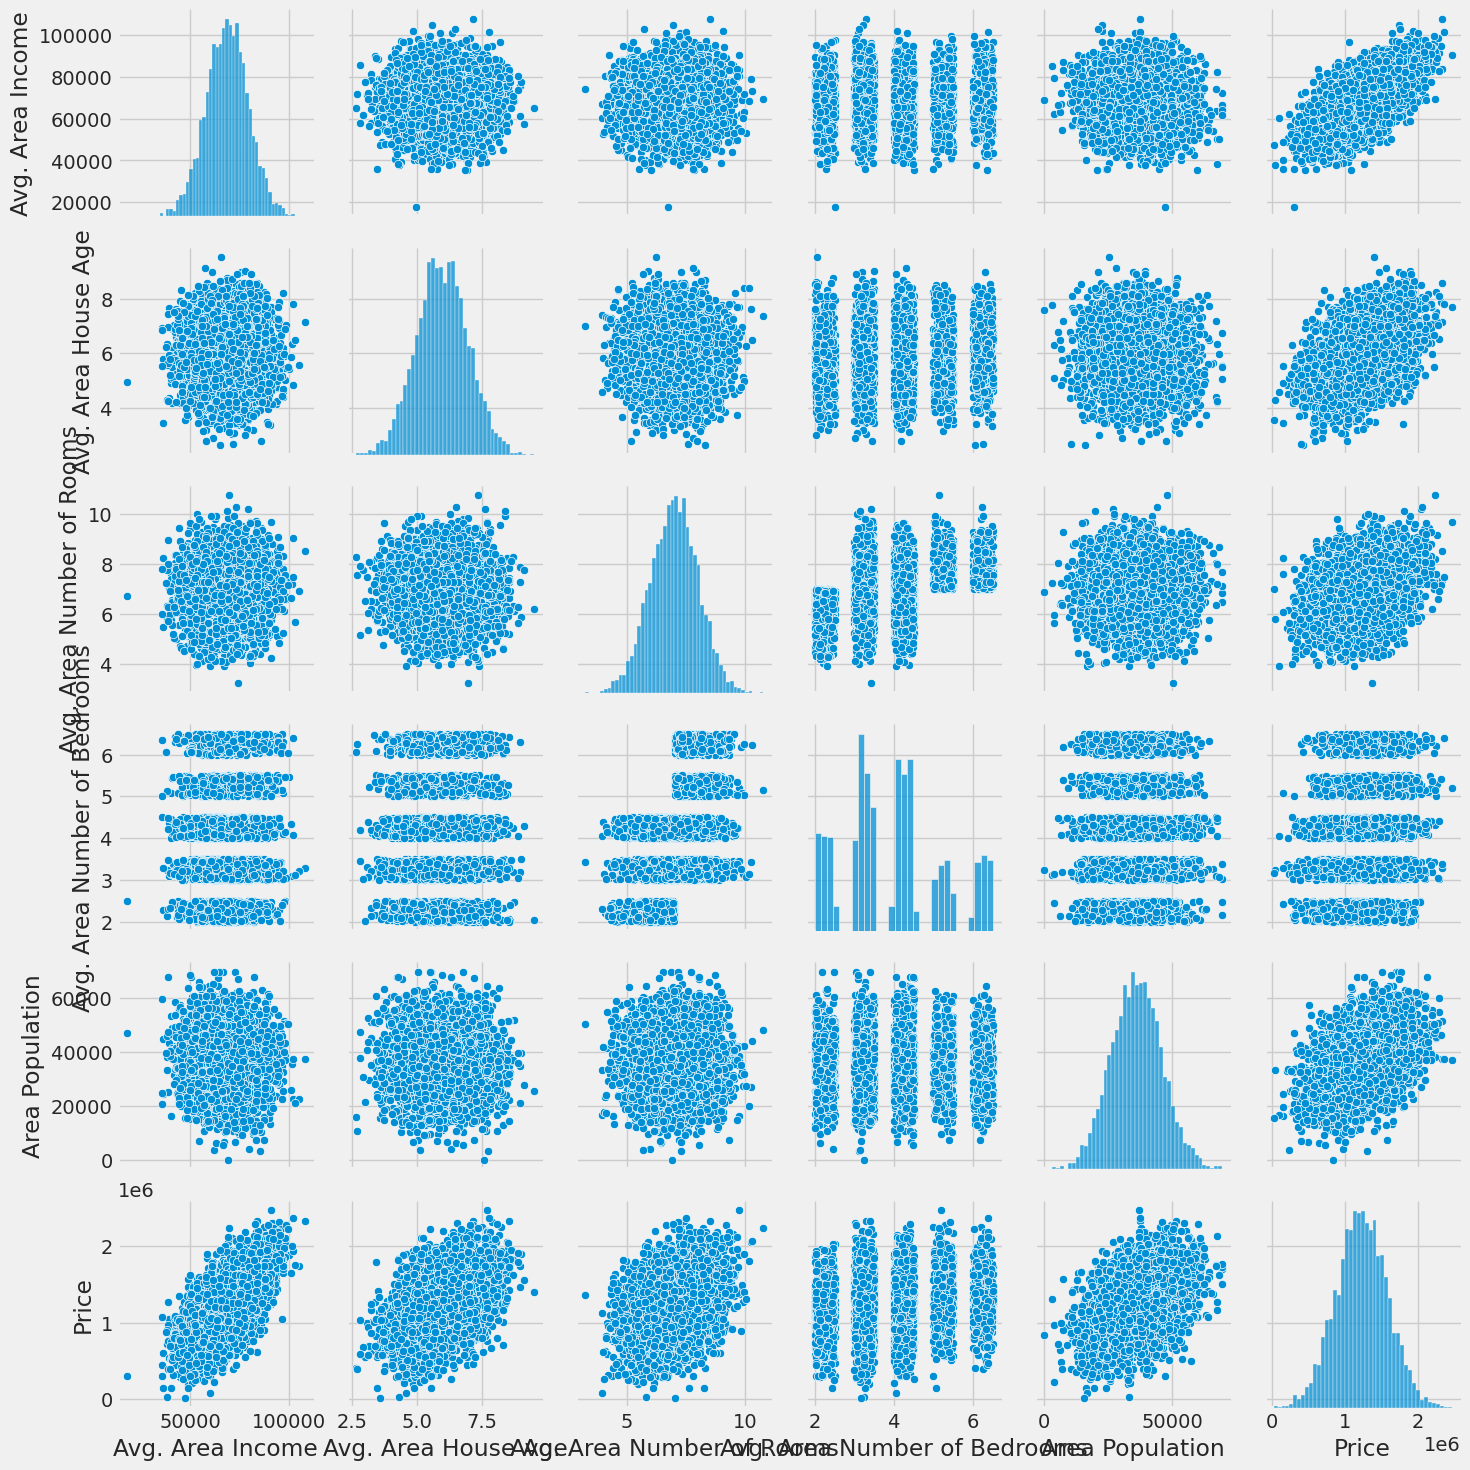

In [0]:
sns.pairplot(USAhousing)

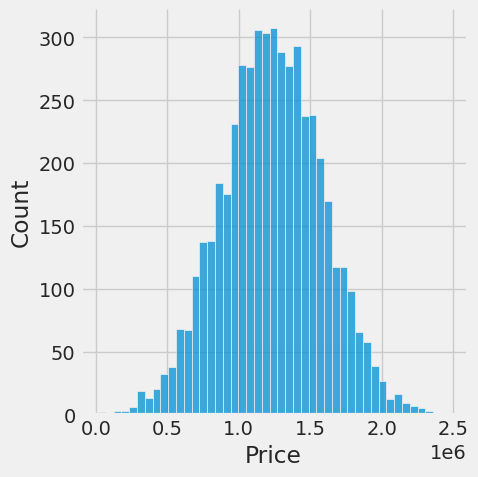

In [0]:
sns.displot(USAhousing["Price"])

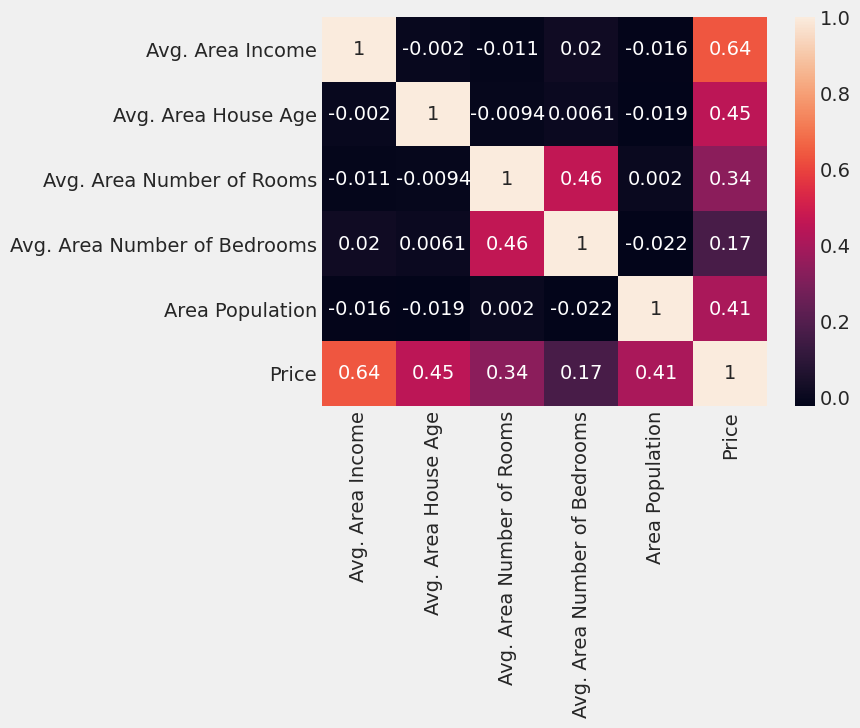

In [0]:
sns.heatmap(USAhousing.corr(),annot= True)

In [0]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
Y = USAhousing['Price']               

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
def cross_val(model):
    predict = cross_val_score(model, X, Y, cv=10)
    return predict.mean()

In [0]:
def print_evalute(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [0]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [0]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [0]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [0]:
print(lin_reg.intercept_)

1228219.1492415662


In [0]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [0]:
pred = lin_reg.predict(X_test)

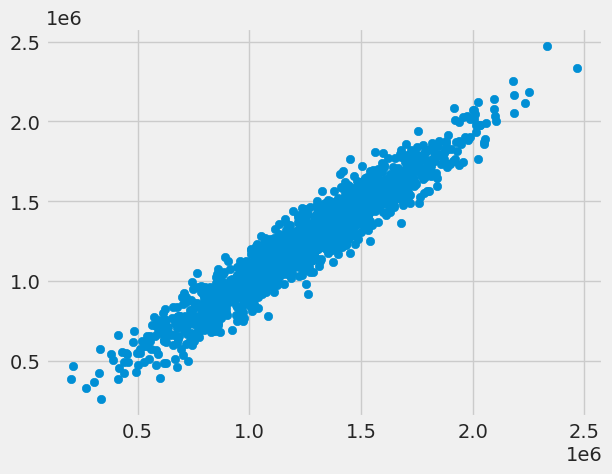

In [0]:
plt.scatter(Y_test, pred)

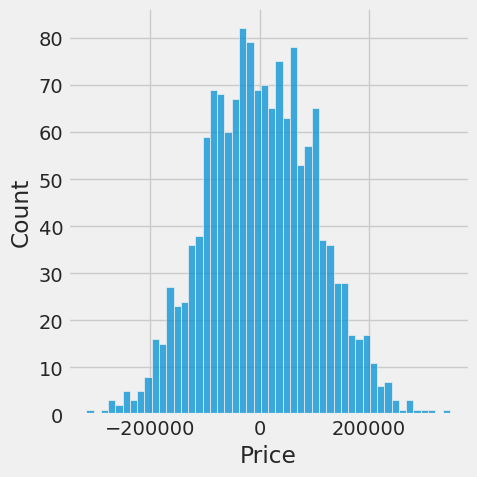

In [0]:
sns.displot((Y_test - pred), bins=50)

In [0]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.400883
RMSE: 100341.52954485438
R2 Square 0.9146818498754016
Train set evaluation:
_____________________________________
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


In [0]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


In [0]:
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87478.09845751169
MSE: 12024845558.450724
RMSE: 109657.85680219509
R2 Square 0.8981034443733925
Train set evaluation:
_____________________________________
MAE: 88109.64012767407
MSE: 12004299732.241194
RMSE: 109564.13524617074
R2 Square 0.9058268654956119


In [0]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533


In [0]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535338
MSE: 10153269900.892612
RMSE: 100763.43533689497
R2 Square 0.9139628674464606
Train set evaluation:
_____________________________________
MAE: 81972.39058585512
MSE: 10382929615.14346
RMSE: 101896.66145239233
R2 Square 0.9185464334441484


In [0]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


In [0]:
model = Lasso(alpha=0.1, 
              precompute=True, 
              warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505


In [0]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


In [0]:

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330945
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
Train set evaluation:
_____________________________________
MAE: 81577.88831531756
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953


In [0]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


In [0]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,Y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119698
MSE: 10081983997.620703
RMSE: 100409.0832426066
R2 Square 0.9145669324195059
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007816
RMSE: 101323.67517519198
R2 Square 0.9194599187853729


In [0]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(Y_test, test_pred), 0]], 
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


In [0]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, Y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.5687532034
MSE: 10068422404.408108
RMSE: 100341.52881239208
R2 Square 0.9146818511209941
Train set evaluation:
_____________________________________
MAE: 81480.49811676599
MSE: 10287043161.223349
RMSE: 101425.06180044136
R2 Square 0.9192986579073477


In [0]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(Y_test, test_pred), 0]], 
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,87478.098458,1.202485e+10,109657.856802,0.898103,0.912533
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.568753,1.006842e+10,100341.528812,0.914682,0.000000


In [0]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 36s 10ms/step - loss: 1635976871936.0000 - val_loss: 1658198687744.0000
Epoch 2/100
3500/3500 [==============================] - 27s 8ms/step - loss: 1635728490496.0000 - val_loss: 1657597198336.0000
Epoch 3/100
3500/3500 [==============================] - 32s 9ms/step - loss: 1634257338368.0000 - val_loss: 1654830661632.0000
Epoch 4/100
3500/3500 [==============================] - 34s 10ms/step - loss: 1629111189504.0000 - val_loss: 1646392115200.0000
Epoch 5/100
3500/3500 [==============================] - 28s 8ms/step - loss: 1615415738368.0000 - val_loss: 1626083164160.0000
Epoch 6/100
3500/3500 [==============================] - 38s 11ms/step - loss: 1585624907776.0000 - val_loss: 1584166469632.0000
Epoch 7/100
3500/3500 [==============================] - 27s 8ms/step - loss: 1527655432192.0000 - val_loss: 1506558607360.0000
Epoch 8/100
3500/3500 [==============================] - 37s 11ms/step - loss: 1428594884608.0000 - v

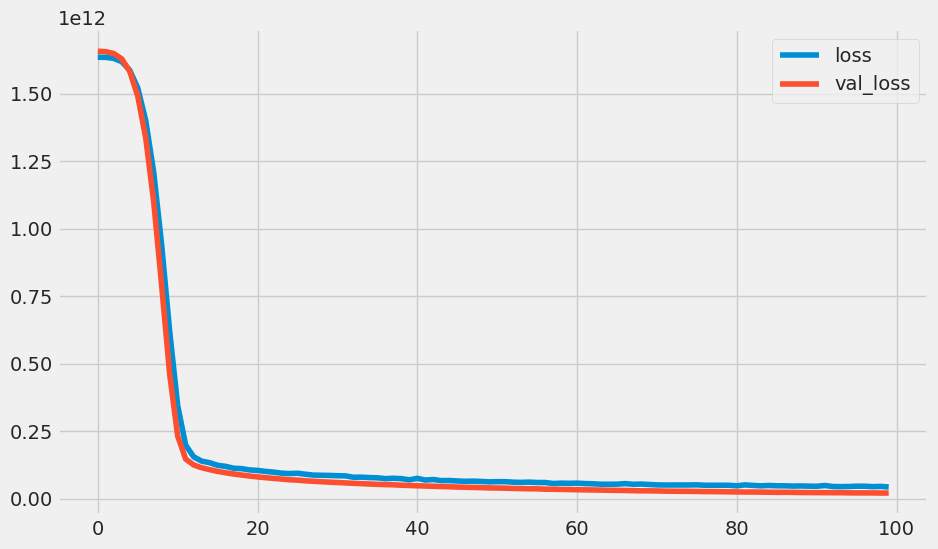

In [0]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 112923.0439391054
MSE: 20357666494.949326
RMSE: 142680.29469744352
R2 Square 0.8274924957374846
Train set evaluation:
_____________________________________
MAE: 110479.99511487305
MSE: 19739459050.42635
RMSE: 140497.185204638
R2 Square 0.845144925263158


In [0]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(Y_test, test_pred), 0]], 
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81393.309910,1.013926e+10,100693.890921,0.914082,0.910397
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566273,1.006842e+10,100341.527904,0.914682,0.000000
7,Artficial Neural Network,112923.043939,2.035767e+10,142680.294697,0.827492,0.000000


In [0]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evalute(Y_train, train_pred)

In [0]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_pred), 0]], 
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [0]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evalute(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evalute(y_train, train_pred)

In [0]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(Y_test, test_pred), 0]], 
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [0]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))